# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Utils
from tqdm import tqdm
import datetime

# Sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, AveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# ResNet Model

In [ ]:
import numpy as np
import pandas as pd
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import shutil
from sklearn.metrics import confusion_matrix, classification_report
# we added the separation an

In [ ]:
import tensorflow as tf
#Our base model is InceptionResNetV2, new readers are encouraged to see the architecture of this particular model

base_model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape = (299,164,3),
                                                     include_top=False)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 10, 6, 2048)       23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

# New Dataset

In [ ]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras import layers, models
from tensorflow.keras import activations

####### Generatiiing Data

#batch_size = 32
#batch_size = 64
#batch_size = 128
batch_size = 128

image_weight = 299 
image_height = 164

train_datagen = ImageDataGenerator(rescale=1./255)                           
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/data/smallerData/train',  ## COV19-XRay Training set (10k(5kCovid & 5kNormal) Images)
        target_size=(image_weight , image_height),
        batch_size=batch_size,
        classes = ['covid','normal'],
        class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/drive/MyDrive/data/smallerData/valid',  ## COV19-XRay Validation set (2k(1kNormal & 1kCovid) images)
        target_size=(image_weight , image_height),
        batch_size=batch_size,
        classes = ['covid','normal'],
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


##Creating Test Data

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)                           
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/data/smallerData/test',  ## COV19-XRay Test set (3k(1.5Covid & 1.5Normal) Images)
        target_size=(image_weight, image_height),
        batch_size=batch_size,
        classes = ['covid','normal'],
        class_mode='binary')

Found 3000 images belonging to 2 classes.


#Fitting Model

In [ ]:
history = model.fit(train_generator, 
                    validation_data=val_generator, epochs=20, 
                    callbacks=[callbacks])

Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 0.3070 - accuracy: 0.8715 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


79/79 [==============================] - 2138s 27s/step - loss: 0.3070 - accuracy: 0.8715 - val_loss: 0.2176 - val_accuracy: 0.9185 - lr: 0.0010
Epoch 2/20
79/79 [==============================] - 1780s 23s/step - loss: 0.1749 - accuracy: 0.9301 - val_loss: 0.1623 - val_accuracy: 0.9415 - lr: 0.0010
Epoch 3/20
79/79 [==============================] - 1839s 23s/step - loss: 0.1387 - accuracy: 0.9492 - val_loss: 0.1022 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 4/20
79/79 [==============================] - 1830s 23s/step - loss: 0.1233 - accuracy: 0.9517 - val_loss: 0.1481 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 5/20
79/79 [==============================] - ETA: 0s - loss: 0.0980 - accuracy: 0.9660 
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
79/79 [==============================] - 1834s 23s/step - loss: 0.0980 - accuracy: 0.9660 - val_loss: 0.1789 - val_accuracy: 0.9265 - lr: 0.0010
Epoch 6/20
79/79 [==============================] - 1830s 23s/step 

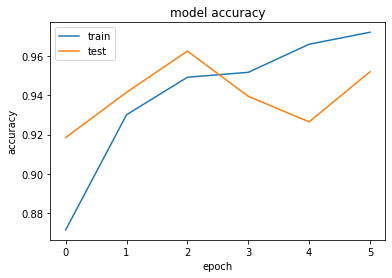

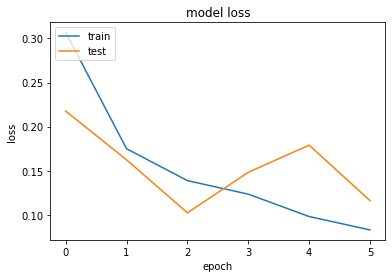

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Evaluation Of Model

In [ ]:
model.load_weights("./covid_classifier_model.h5")
model.evaluate(test_generator)

24/24 [==============================] - 523s 21s/step - loss: 0.2802 - accuracy: 0.8907


[0.2801540493965149, 0.890666663646698]